# Vectorization for Recommender
- Term-document matrix <br>
자연어처리에서 가장 기본적인 벡터화 방법

- 숫자로 표현된 것은 기본적으로 사용할 수 있음


### Vector
- 숫자를 공간에 표현
- 차원이 늘어날수록 사람이 확인할 수 있게 표현하기 힘들다. (공간의 특정한 점이라고 개념적으로 인식)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Example Vector
price = np.array([0, 15000, 30000])
screen_size = np.array([0, 13, 16])
df = pd.DataFrame({'Price Difference': price, 'Screen Size': screen_size, 'Label': ['Origin', 'Vector 1', 'Vector 2']})

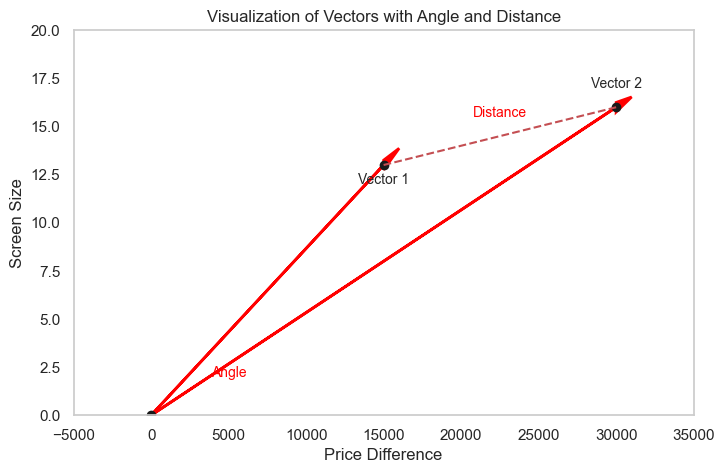

In [7]:
# Visualization
plt.figure(figsize=(8, 5))

plt.plot(price, screen_size, 'ko') 

plt.arrow(0, 0, price[1], screen_size[1], head_width=0.5, head_length=1000, fc='red', ec='red', lw=2)
plt.arrow(0, 0, price[2], screen_size[2], head_width=0.5, head_length=1000, fc='red', ec='red', lw=2)

mid_price = (price[1] + price[2]) / 2
mid_screen_size = (screen_size[1] + screen_size[2]) / 2

plt.plot([price[1], price[2]], [screen_size[1], screen_size[2]], 'r--')

distance = np.sqrt((price[2] - price[1])**2 + (screen_size[2] - screen_size[1])**2)

plt.text(price[1], screen_size[1] - 1, 'Vector 1', fontsize=10, ha='center')
plt.text(price[2], screen_size[2] + 1, 'Vector 2', fontsize=10, ha='center')

plt.text(5000, 2, 'Angle', fontsize=10, color='red', ha='center')
plt.text(mid_price, mid_screen_size + 1, 'Distance', fontsize=10, color='red', ha='center')

plt.xlabel('Price Difference')
plt.ylabel('Screen Size')
plt.title('Visualization of Vectors with Angle and Distance')

plt.xlim(-5000, 35000)
plt.ylim(0, 20)

plt.grid()
plt.show()


### Calculating Similarity
- 주로 많이 사용됨
- 유클리디안 거리는 군집화에 많이 사용됨

In [4]:
# 4개의 차원을 가진 벡터
# 각 차원은 특징을 의미
아이패드9_vec = np.array([9, 10.2, 64, 248.39])
아이패드9_vec

# 만약 [10.2, 11, 248.39, 128] 과 같이 차원의 특징이 다르다면 비교할 수 없게 됨 -> 각 차원의 특징을 일치시켜야 함
# 동일한 방식으로 정보(벡터)를 수집한 다음 벡터들을 비교

array([  9.  ,  10.2 ,  64.  , 248.39])

In [6]:
# 벡터들을 코사인유사도를 통해 비교하기
상품1 = np.array([9, 10.2, 64, 248.39])
상품1
상품2 = np.array((7.0, 12.4, 256.0, 322.17))
상품5 = np.array((8.0, 8.7, 128.0, 189.39))

In [7]:
상품1, 상품2, 상품5

(array([  9.  ,  10.2 ,  64.  , 248.39]),
 array([  7.  ,  12.4 , 256.  , 322.17]),
 array([  8.  ,   8.7 , 128.  , 189.39]))

In [12]:
def cos_sim(vec1:np.ndarray, vec2:np.ndarray):
    return np.sum(vec1 * vec2) / (np.sum(vec1**2) ** (1/2) * np.sum(vec2**2) ** (1/2))

In [19]:
print(cos_sim(상품1, 상품1)) # 각도가 0
print(cos_sim(상품1, 상품2))
print(cos_sim(상품1, 상품5))

# 서로 비슷한 방향을 바라보고 있을 수록 높은 값을 가짐
# 계산 대상이 만약 수없이 많아지면 cos_sim 계산이 횟수가 굉장히 많아지게 됨 -> 최적화 필요. (넘파이의 기능이나 라이브러리 사용)

1.0000000000000002
0.9133496888508772
0.9421886392241037


#### Points to Consider
- When dimensions and content differ:
    - For example, recommending a product that is not related to an iPad, like an SSD.
    - How do you make recommendations when the feature dimensions are completely different?
    - Even if the dimensions are aligned, they may not have the same value or meaning.<br/>
<br/>

- Categorical data:
    - Can be represented through encoding.
    - Term-document matrix: a fundamental vectorization technique in natural language processing.
    - What criteria should be used for representation? (This applies not only to text but also to other unstructured data processing.)

# Types of Recommender Systems

- 지도 학습법 : 타겟이 있음 (새로운 고객, 상품이 추가되었을 때는 불가능한 케이스가 많음)
- 클러스터링 : 유저를 벡터화하고 군집화하고 묶음 

- Content-Based Filtering
    - 사용자가 특정한 아이템을 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식
    - 벡터 - 이미지, 음성, 상품 설명서, 리뷰 등 컨텐츠에 대한 설명<br/>
<br/>

- Collaborative Filtering
    - 사용자와 아이템 간의 상호 상관 관계를 분석하여 새로운 사용자-아이템 관계를 찾아주는 것으로 사용자의 과거 경험과 User Behavier에 의존하여 추천하는 시스템
    - 장바구니 분석
    - 소비 여부, 선호도를 조사 - 개인화된 추천 시스템 개발 가능
    - 벡터 - 소비 여부, 아이템에 대한 평가, 리뷰 데이터<br/>
<br/>

- Hybrid filtering

In [7]:
# A matrix representing the correlation between users and products.
# Comparing users (rows) is collaborative filtering.
# Comparing products (columns) is content-based filtering.
# Similar to TDM

import pandas as pd

data = {
    'User': ['User 1', 'User 2', 'User 3', 'User 4', 'User 5'],
    'Meat': [5, 1, 0, 4, 2],
    'Beer': [3, 0, 1, 2, 4],
    'Sugar': [1, 0, 1, 3, 1],
    'Milk': [2, 3, 0, 5, 1],
    'Bread': [0, 2, 4, 1, 3]
}

df = pd.DataFrame(data)
print(df)

     User  Meat  Beer  Sugar  Milk  Bread
0  User 1     5     3      1     2      0
1  User 2     1     0      0     3      2
2  User 3     0     1      1     0      4
3  User 4     4     2      3     5      1
4  User 5     2     4      1     1      3


Recommendation Methods

- For example, if two users have high similarity, a product that one user has not consumed can be recommended to them.

# Movie Recommender System

## Content-Based Filtering

In [ ]:
import pandas as pd
import numpy as np
import warning; warnings.filterings('ignore')

### Data Preparation

## Collaborative Filtering